In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pymc3 as pm
import seaborn as sns

In [22]:
path = '/home/hannakasperer/Dissertation-/Sample/main_sample_ab.csv'
sample = pd.read_csv(path,sep=',') 

In [23]:
sample

,star,teff,erteff,logg,erlogg,vtur,ervtur,feh,erfeh,NaI,...,f_iron_pbb_err,f_iron_exolens_P,f_iron_exoplens_P_upper,f_iron_exolens_P_lower,f_iron_exolens_S,f_iron_exolens_S_err,f_iron_exoplex_gaus,f_iron_exoplex_unif,f_iron_exoplex_gaus_err,f_iron_exoplex_unif_err
0,55Cnc_SINGLEHR11_ESPRESSO_2022,5310,51,4.211,0.116,0.907,0.069,0.299,0.033,6.931,...,2.10,6.862803,8.431848,8.796961,29.036816,3.022297,8.171521,5.373065,4.694734,0.000000
1,CoRoT-07_ESPRESSO_2024,5269,31,4.381,0.070,0.694,0.061,0.044,0.020,6.456,...,1.98,54.748207,13.767431,15.408328,32.345937,2.376082,36.328415,55.969306,7.909221,6.297244
2,K2-106_ESPRESSO_2024,5505,24,4.338,0.040,0.738,0.037,0.080,0.017,6.498,...,1.36,40.142837,9.097928,10.139623,33.135240,2.794964,35.799165,29.061990,5.500530,13.267039
3,K2-314_ESPRESSO_2024,5555,21,4.023,0.039,1.008,0.026,0.163,0.017,6.556,...,2.01,-0.973743,21.886443,24.850850,28.765998,2.990467,17.070662,NaN,7.319743,NaN
4,K2-229_ESPRESSO_2024,5126,34,4.336,0.079,0.809,0.066,-0.088,0.020,6.340,...,1.62,67.699962,15.150926,18.261896,29.578864,3.006465,31.829867,71.452508,8.301016,11.685725
5,HD136352_SINGLEHR11_ESPRESSO_2022,5652,16,4.371,0.030,0.880,0.028,-0.353,0.013,6.082,...,1.26,-0.563045,15.135766,16.721095,24.133177,2.746897,13.419642,NaN,6.060813,NaN
6,HD137496_ESPRESSO_2024,5797,18,4.093,0.025,1.129,0.022,-0.034,0.014,6.260,...,0.88,67.514149,12.088198,14.052073,31.010453,1.243589,31.330112,67.906619,3.296939,6.327952
7,TOI-402_ESPRESSO_2024,5067,47,4.201,0.119,0.568,0.098,0.054,0.027,6.582,...,1.72,33.195372,14.008974,15.769652,29.498640,2.781164,29.670903,15.683370,6.368861,1.550063
8,HD20329_ESPRESSO_2024,5574,17,4.285,0.031,0.824,0.028,-0.106,0.014,6.325,...,0.84,33.624315,16.964722,19.892627,23.823367,1.160150,22.272164,41.050002,2.904006,8.116552
9,HD213885_ESPRESSO_2024,5906,17,4.427,0.025,1.043,0.025,-0.005,0.013,6.402,...,0.81,41.921004,11.100258,12.017024,32.695349,1.037364,31.550260,38.059754,2.837946,16.772735


In [119]:
np.min(sample["feh"])

-0.477

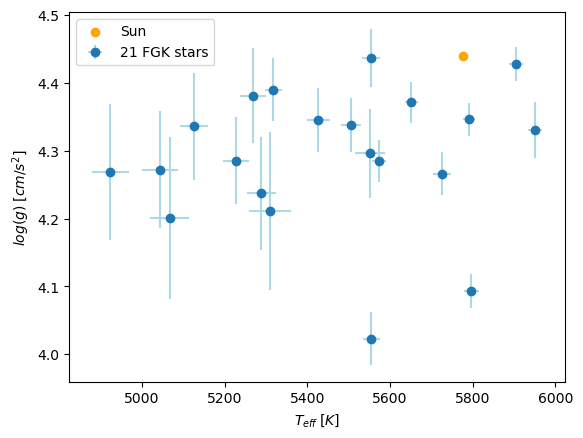

In [124]:
plt.errorbar(sample["teff"],sample["logg"],xerr=sample["erteff"],yerr=sample["erlogg"],fmt="o",ecolor="lightblue",label="21 FGK stars")
plt.scatter(5777,4.44,label="Sun",color="orange")

plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')

plt.legend()
plt.savefig('/home/hannakasperer/Dissertation-/Sample/stellar_teff_logg.pdf', format='pdf')
plt.show()

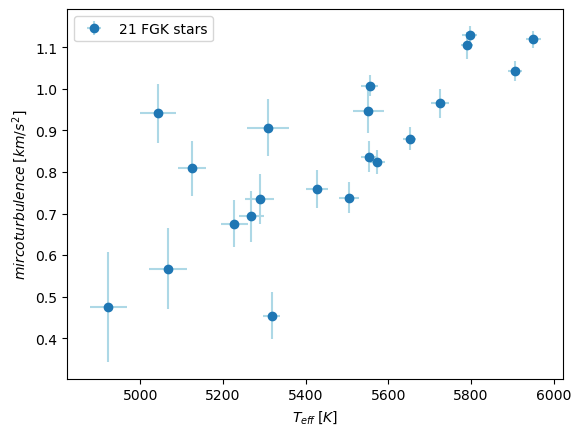

In [131]:
plt.errorbar(sample["teff"],sample["vtur"],xerr=sample["erteff"],yerr=sample["ervtur"],fmt="o",ecolor="lightblue",label="21 FGK stars")

plt.ylabel(r'$mircoturbulence \; [km / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')

plt.legend()
plt.show()

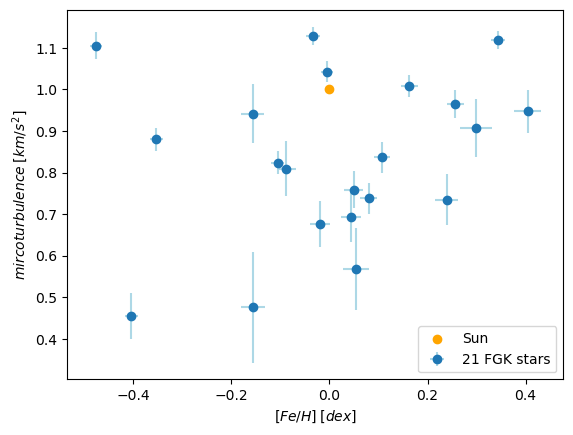

In [135]:
plt.errorbar(sample["feh"],sample["vtur"],xerr=sample["erfeh"],yerr=sample["ervtur"],fmt="o",ecolor="lightblue",label="21 FGK stars")
plt.scatter(0,1.0,label="Sun",color="orange")

plt.ylabel(r'$mircoturbulence \; [km / s^{2}]$')
plt.xlabel(r'$ [Fe/H] \; [dex]$')

plt.legend(loc="lower right")
plt.savefig('/home/hannakasperer/Dissertation-/Sample/stellar_feh_vtur.pdf', format='pdf')
plt.show()

linear fit: y =  1.8150200777415604  x + -14.03155292855067


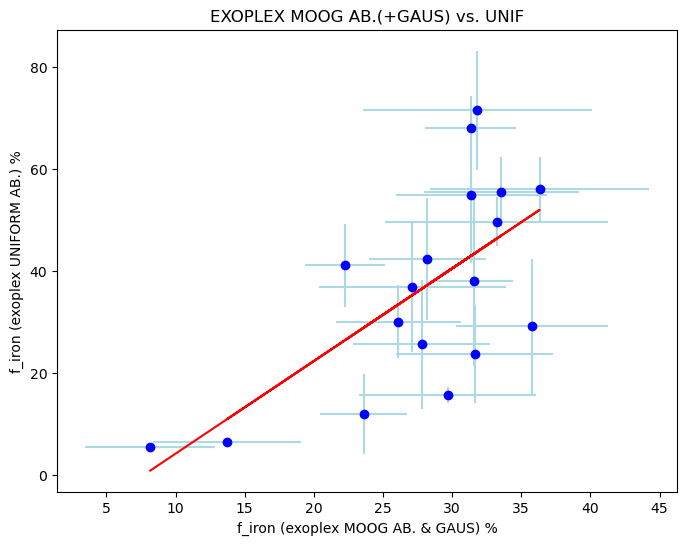

In [29]:
plt.figure(figsize=(8,6))
plt.title("EXOPLEX MOOG AB.(+GAUS) vs. UNIF")
plt.errorbar(sample['f_iron_exoplex_gaus'],sample['f_iron_exoplex_unif'], xerr=sample['f_iron_exoplex_gaus_err'],yerr=sample['f_iron_exoplex_unif_err'],fmt="o",color="b",ecolor="lightblue")
plt.xlabel("f_iron (exoplex MOOG AB. & GAUS) %")
plt.ylabel("f_iron (exoplex UNIFORM AB.) %")


arr1_nan = np.array(sample['f_iron_exoplex_gaus'])  
arr2_nan = np.array(sample['f_iron_exoplex_unif']) 
arr1 = arr1_nan[np.isfinite(arr1_nan) & np.isfinite(arr2_nan)]
arr2 = arr2_nan[np.isfinite(arr1_nan) & np.isfinite(arr2_nan)]


k,d = np.polyfit(arr1,arr2, 1)
yfit = k * np.array(arr1) + d
plt.plot(arr1, yfit, color='r')
print("linear fit: y = ",k," x +",d)


plt.savefig("/home/hannakasperer/Dissertation-/plots/exoplex_gaus_vs_unif.png",format="png")
plt.show()

linear fit: y =  2.0358493529529196  x + -34.25802717893866


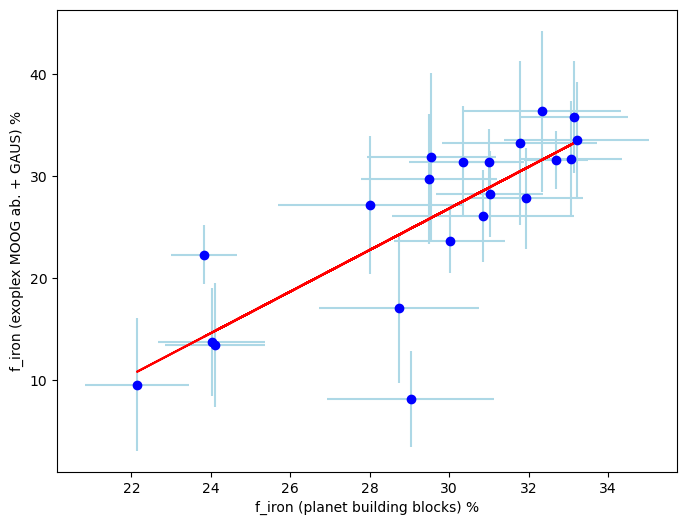

In [30]:
plt.figure(figsize=(8,6))
plt.errorbar(sample['f_iron_pbb'],sample['f_iron_exoplex_gaus'],xerr=sample['f_iron_pbb_err'], yerr=sample['f_iron_exoplex_gaus_err'],fmt="o",color="b",ecolor="lightblue")
plt.xlabel("f_iron (planet building blocks) %")
plt.ylabel("f_iron (exoplex MOOG ab. + GAUS) %")


arr1_nan = np.array(sample['f_iron_pbb'])  
arr2_nan = np.array(sample['f_iron_exoplex_gaus']) 
arr1 = arr1_nan[np.isfinite(arr1_nan) & np.isfinite(arr2_nan)]
arr2 = arr2_nan[np.isfinite(arr1_nan) & np.isfinite(arr2_nan)]


k,d = np.polyfit(arr1,arr2, 1)
yfit = k * np.array(arr1) + d
plt.plot(arr1, yfit, color='r')
print("linear fit: y = ",k," x +",d)


plt.savefig("/home/hannakasperer/Dissertation-/plots/pbb_vs_exoplex_gaus.png",format="png")
plt.show()

linear fit: y =  2.0336493237660314  x + -24.88762911107291


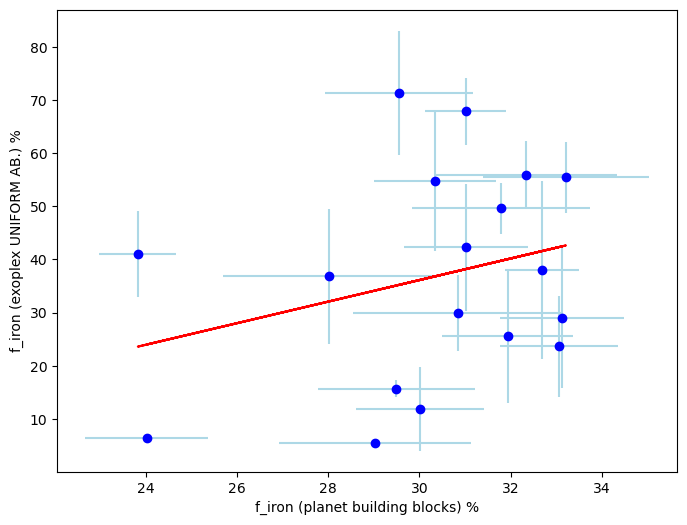

In [32]:
plt.figure(figsize=(8,6))
plt.errorbar(sample['f_iron_pbb'],sample['f_iron_exoplex_unif'],xerr=sample['f_iron_pbb_err'], yerr=sample["f_iron_exoplex_unif_err"],fmt="o",color="b",ecolor="lightblue")
plt.xlabel("f_iron (planet building blocks) %")
plt.ylabel("f_iron (exoplex UNIFORM AB.) %")


arr1_nan = np.array(sample['f_iron_pbb'])  
arr2_nan = np.array(sample['f_iron_exoplex_unif']) 
arr1 = arr1_nan[np.isfinite(arr1_nan) & np.isfinite(arr2_nan)]
arr2 = arr2_nan[np.isfinite(arr1_nan) & np.isfinite(arr2_nan)]


k,d = np.polyfit(arr1,arr2, 1)
yfit = k * np.array(arr1) + d
plt.plot(arr1, yfit, color='r')
print("linear fit: y = ",k," x +",d)


plt.savefig("/home/hannakasperer/Dissertation-/plots/pbb_vs_exoplex_unif.png",format="png")
plt.show()

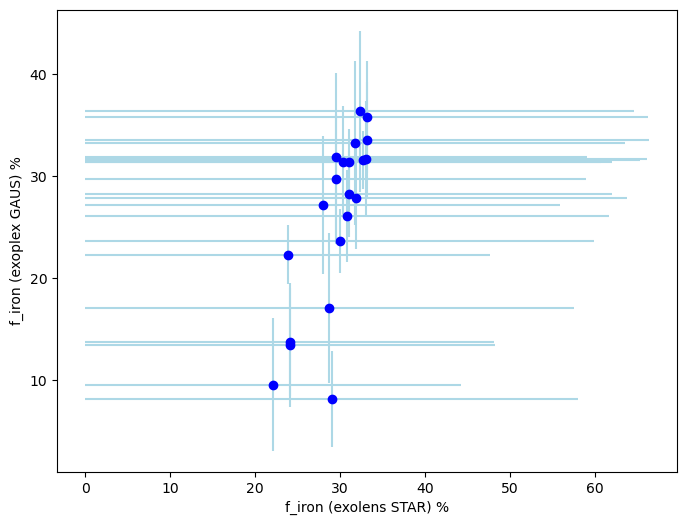

In [34]:
plt.figure(figsize=(8,6))
plt.errorbar(sample['f_iron_exolens_S'],sample['f_iron_exoplex_gaus'],xerr=sample['f_iron_exolens_S'],yerr=sample['f_iron_exoplex_gaus_err'],fmt="o",color="b",ecolor="lightblue")
plt.xlabel("f_iron (exolens STAR) %")
plt.ylabel("f_iron (exoplex GAUS) %")
plt.savefig("/home/hannakasperer/Dissertation-/plots/exolens_S_vs_exoplex.png",format="png")
plt.show()

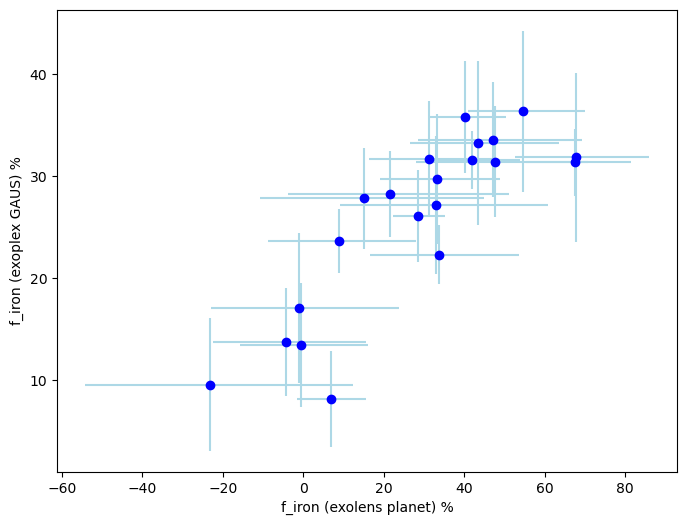

In [35]:

xerr= [sample['f_iron_exoplens_P_upper'],sample['f_iron_exolens_P_lower']]


plt.figure(figsize=(8,6))
plt.errorbar(sample['f_iron_exolens_P'],sample['f_iron_exoplex_gaus'],xerr=xerr,yerr=sample['f_iron_exoplex_gaus_err'],fmt="o",color="b",ecolor="lightblue")
plt.xlabel("f_iron (exolens planet) %")
plt.ylabel("f_iron (exoplex GAUS) %")
plt.savefig("/home/hannakasperer/Dissertation-/plots/exolens_P_vs_exoplex.png",format="png")
plt.show()

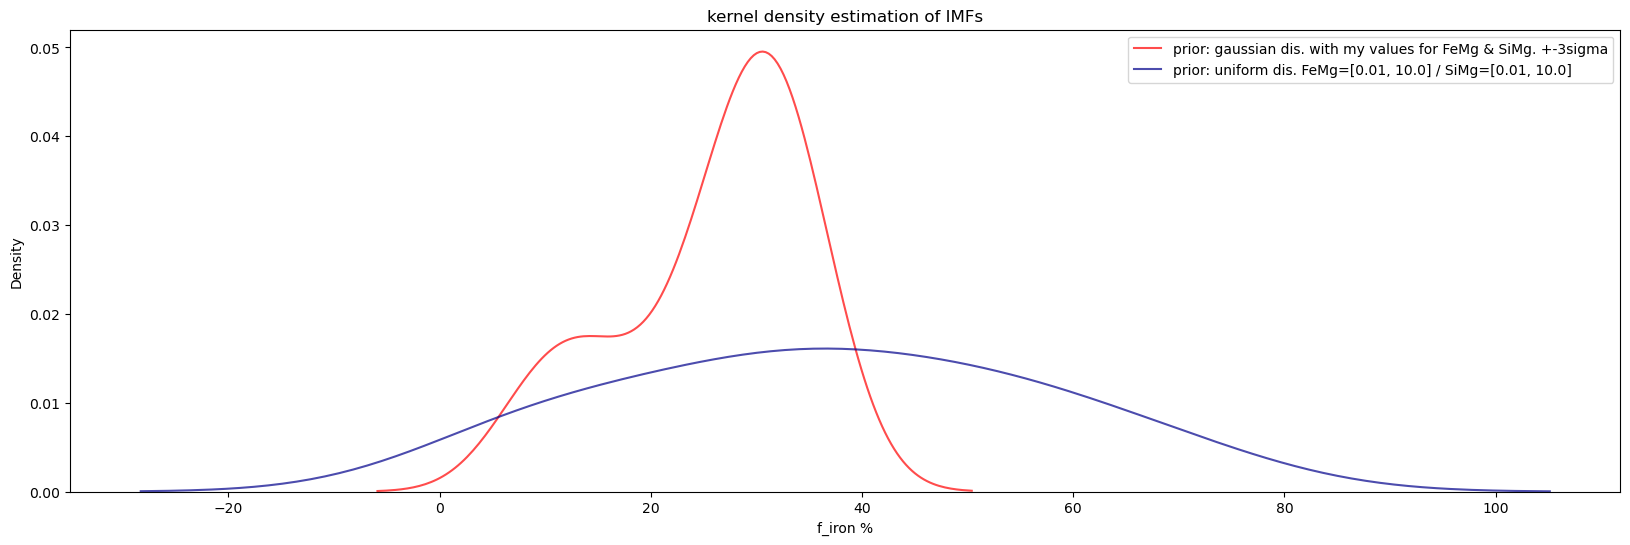

In [47]:
plt.figure(figsize=(20, 6))  
#kernel density estimation (KDE)
#histogram --> continuous curve 
sns.kdeplot(sample["f_iron_exoplex_gaus"], color='red', label="prior: gaussian dis. with my values for FeMg & SiMg. +-3sigma",  alpha=0.7)
sns.kdeplot(sample["f_iron_exoplex_unif"], color='darkblue', label="prior: uniform dis. FeMg=[0.01, 10.0] / SiMg=[0.01, 10.0]", alpha=0.7)
#sns.kdeplot(sample["f_iron_pbb"], color='green', label="planet building blocks", alpha=0.7)


plt.title('kernel density estimation of IMFs')
plt.xlabel('f_iron %')
plt.legend()
plt.savefig("/home/hannakasperer/Dissertation-/plots/CMF_comparison.png",format="png")
plt.show()

In [86]:
sample["f_iron_exoplex_gaus"]

0      8.171521
1     36.328415
2     35.799165
3     17.070662
4     31.829867
5     13.419642
6     31.330112
7     29.670903
8     22.272164
9     31.550260
10    23.608887
11    31.629984
12    27.794705
13     9.565724
14    33.226845
15    28.211837
16    33.565218
17    31.399793
18    27.113813
19    13.721378
20    26.097169
Name: f_iron_exoplex_gaus, dtype: float64

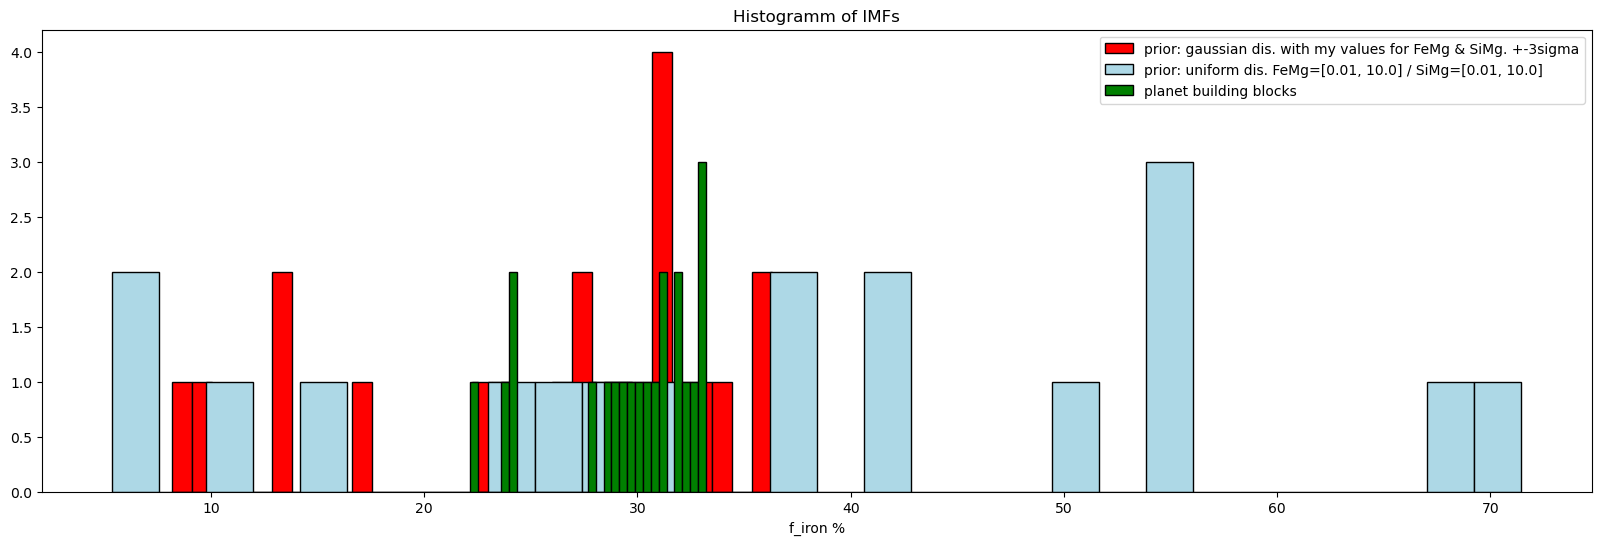

In [ ]:
plt.figure(figsize=(20, 6))  

plt.hist(sample["f_iron_exoplex_gaus"], color='red', bins=30, edgecolor="black", label="prior: gaussian dis. with my values for FeMg & SiMg. +-3sigma")
plt.hist(sample["f_iron_exoplex_unif"], color='lightblue', bins=30, edgecolor="black",label="prior: uniform dis. FeMg=[0.01, 10.0] / SiMg=[0.01, 10.0]")
#plt.hist(sample["f_iron_pbb"],color="green",bins=30,edgecolor="black",label="planet building blocks")

plt.title('Histogramm of IMFs')
plt.xlabel('f_iron %')
plt.legend()
#plt.savefig("/home/hannakasperer/Dissertation-/plots/.png",format="png")
plt.show()

### M-R RELATIONS

In [48]:
#pure iron 100% fe
radius_pure_iron = []
mass_pure_iron = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/pure_iron.txt', 'r') as file:
    for line in file:
        values = line.strip().split()
        
        radius_pure_iron.append(float(values[1]))
        mass_pure_iron.append(float(values[0]))

print("Radius List:", radius_pure_iron)
print("Mass List:", mass_pure_iron)

Radius List: [0.1175, 0.1314, 0.1469, 0.1641, 0.1832, 0.2041, 0.2272, 0.2525, 0.2801, 0.31, 0.3422, 0.3768, 0.4138, 0.4529, 0.4943, 0.5376, 0.5828, 0.6297, 0.6781, 0.7279, 0.7789, 0.831, 0.884, 0.9377, 0.9922, 1.0471, 1.1025, 1.1582, 1.2142, 1.2705, 1.3269, 1.3834, 1.44, 1.4966, 1.5532, 1.6099, 1.666, 1.7209, 1.7747, 1.8275, 1.8791, 1.9294, 1.9785, 2.026, 2.0719, 2.116, 2.1581, 2.1982, 2.2361]
Mass List: [0.0021, 0.0029, 0.0041, 0.0057, 0.008, 0.0111, 0.0154, 0.0213, 0.0293, 0.0401, 0.0546, 0.0739, 0.0993, 0.1326, 0.1758, 0.2313, 0.3023, 0.3921, 0.5051, 0.6462, 0.8212, 1.0371, 1.3018, 1.625, 2.0176, 2.4927, 3.0655, 3.7538, 4.5782, 5.5631, 6.7367, 8.1322, 9.7879, 11.7489, 14.0676, 16.805, 20.0062, 23.7165, 28.0181, 33.0006, 38.7619, 45.4074, 53.0498, 61.8097, 71.8161, 83.2082, 96.1382, 110.7759, 127.3145]


In [49]:
#earth like rocky 32.5% Fe + 67.5% MgSiO3
radius_earthlike = []
mass_earthlike = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/earth_like.txt', 'r') as file:
    for line in file:
        values = line.strip().split()
        
        radius_earthlike.append(float(values[1]))
        mass_earthlike.append(float(values[0]))

print("Radius List:", radius_earthlike)
print("Mass List:", mass_earthlike)

Radius List: [0.1648, 0.1831, 0.2036, 0.2267, 0.2524, 0.281, 0.3128, 0.3476, 0.3854, 0.4265, 0.4697, 0.515, 0.5625, 0.61, 0.6608, 0.715, 0.7725, 0.833, 0.8964, 0.9625, 1.0309, 1.1015, 1.1741, 1.2485, 1.3245, 1.4019, 1.4806, 1.5604, 1.6412, 1.7228, 1.8052, 1.8883, 1.9719, 2.0559, 2.1404, 2.2246, 2.3063, 2.3848, 2.4602, 2.5325, 2.6019, 2.6683, 2.7319, 2.7924, 2.8497, 2.9034, 2.9536, 3.0002, 3.0431]
Mass List: [0.003, 0.0042, 0.0059, 0.0082, 0.0114, 0.0159, 0.0221, 0.0306, 0.042, 0.0575, 0.0779, 0.1046, 0.1393, 0.1831, 0.2402, 0.3142, 0.4093, 0.5304, 0.6835, 0.8756, 1.115, 1.4114, 1.7763, 2.2233, 2.7682, 3.4297, 4.2296, 5.1932, 6.3505, 7.7363, 9.3912, 11.3628, 13.7066, 16.487, 19.7797, 23.6585, 28.152, 33.3138, 39.2487, 46.0693, 53.8965, 62.8692, 73.1339, 84.8337, 98.1197, 113.1545, 130.1162, 149.2054, 170.6534]


In [50]:
#pure rock 100 % MgSiO3
radius_pure_rock = []
mass_pure_rock = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/pure_rock.txt', 'r') as file:
    for line in file:
        values = line.strip().split()
        
        mass_pure_rock.append(float(values[0]))
        radius_pure_rock.append(float(values[1]))

print("Radius List:", radius_pure_rock)
print("Mass List:", mass_pure_rock)

Radius List: [0.2533, 0.2831, 0.3167, 0.3533, 0.3926, 0.436, 0.4778, 0.5214, 0.5659, 0.6064, 0.6542, 0.7083, 0.7682, 0.8332, 0.9031, 0.9772, 1.0552, 1.1368, 1.2214, 1.3089, 1.3987, 1.4906, 1.5844, 1.6797, 1.7763, 1.8739, 1.9725, 2.0718, 2.1716, 2.2719, 2.3716, 2.4665, 2.5564, 2.642, 2.7237, 2.8016, 2.8759, 2.9467, 3.0138, 3.0774, 3.1372, 3.1933, 3.2455, 3.2941, 3.3389, 3.3801, 3.4179, 3.4524, 3.484, 3.5128, 3.539, 3.5629, 3.5847, 3.6044, 3.6222, 3.6379]
Mass List: [0.0094, 0.0133, 0.0188, 0.0263, 0.0363, 0.0502, 0.0668, 0.0883, 0.1151, 0.1453, 0.1882, 0.2467, 0.3252, 0.4289, 0.5643, 0.7393, 0.9634, 1.2479, 1.6061, 2.0541, 2.6105, 3.2973, 4.1404, 5.1702, 6.422, 7.9376, 9.7656, 11.9628, 14.5957, 17.7419, 21.4589, 25.6899, 30.5051, 35.9972, 42.2655, 49.4164, 57.5637, 66.8285, 77.339, 89.2314, 102.6513, 117.7562, 134.7189, 153.7329, 175.0178, 198.8262, 225.4501, 255.228, 288.5492, 325.857, 367.6497, 414.4773, 466.9373, 525.6648, 591.3243, 664.5985]


In [51]:
#adding H2 gaseous atmosphere (0.1% H2 at 2000 K)
radius_pure_h2o = []
mass_pure_h2o = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/100_h20_1000K.txt', 'r') as file:
    for line in file:
        values = line.strip().split()

        mass_pure_h2o.append(float(values[0]))
        radius_pure_h2o.append(float(values[1]))

print("Radius List:", radius_pure_h2o)
print("Mass List:", mass_pure_h2o)

Radius List: [16.679, 4.387, 2.821, 2.251, 1.968, 1.815, 1.742, 1.712, 1.71, 1.731, 1.769, 1.811, 1.85, 1.901, 1.963, 2.037, 2.124, 2.218, 2.32, 2.426, 2.536, 2.65, 2.767, 2.884, 3.001, 3.116, 3.229, 3.34, 3.449, 3.556, 3.662, 3.764, 3.863, 3.957, 4.046, 4.129, 4.206, 4.277, 4.342, 4.401, 4.455, 4.503, 4.545, 4.582, 4.615, 4.642, 4.666, 4.685, 4.701]
Mass List: [0.085, 0.105, 0.133, 0.168, 0.212, 0.269, 0.341, 0.432, 0.547, 0.691, 0.871, 1.076, 1.291, 1.578, 1.954, 2.442, 3.067, 3.841, 4.795, 5.96, 7.369, 9.075, 11.142, 13.58, 16.446, 19.795, 23.698, 28.228, 33.498, 39.628, 46.728, 54.927, 64.221, 74.799, 86.763, 100.15, 115.116, 131.828, 150.456, 171.183, 194.205, 219.742, 248.037, 279.37, 314.066, 352.499, 395.1, 442.363, 494.844]


In [52]:
#adding H2 gaseous atmosphere (0.1% H2 at 2000 K)
radius_pure_h2o = []
mass_pure_h2o = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/01_h2_2000K.txt', 'r') as file:
    for line in file:
        values = line.strip().split()

        mass_pure_h2o.append(float(values[0]))
        radius_pure_h2o.append(float(values[1]))

print("Radius List:", radius_pure_h2o)
print("Mass List:", mass_pure_h2o)

Radius List: [15.120579334081544, 3.9877785637780057, 3.0150957440604222, 2.5073267585510326, 2.363633205495819, 2.3123240544153543, 2.3052434948722933, 2.332209358616224, 2.365556210931836, 2.4345066583972286, 2.4996694505778487, 2.655292058058325, 2.9020985839018225]
Mass List: [1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 8.0, 10.0, 12.0, 16.0, 20.0, 32.0, 64.0]


In [53]:
#adding H2 gaseous atmosphere (50% Earth-like rocky core + 50% H2O layer by mass at 2000 K)
radius_half_h2o = []
mass_half_h2o = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/5_h2_2000K.txt', 'r') as file:
    for line in file:
        values = line.strip().split()
        
        mass_half_h2o.append(float(values[0]))
        radius_half_h2o.append(float(values[1]))

print("Radius List:", radius_half_h2o)
print("Mass List:", mass_half_h2o)

Radius List: [79.13563949853146, 16.760875914873786, 11.11820585135525, 7.922676414742548, 6.772991070501683, 5.67117257668021, 5.230003779770051]
Mass List: [8.4, 10.5, 12.6, 16.8, 21.0, 33.6, 67.2]


## M-R diagrams

In [54]:
mass_jup = sample['planet_mass']
radius_jup = sample['planet_radius']
mass_sigma_jup = sample['planet_mass_rel_err']
radius_sigma_jup = sample['planet_radius_rel_err']

#convertion ratio
jup_to_earth_r = 11.209
jup_to_earth_m = 317.83

#convert them to earth units
radius = radius_jup * jup_to_earth_r
mass = mass_jup * jup_to_earth_m

radius_sigma = radius_sigma_jup * radius
mass_sigma = mass_sigma_jup * mass

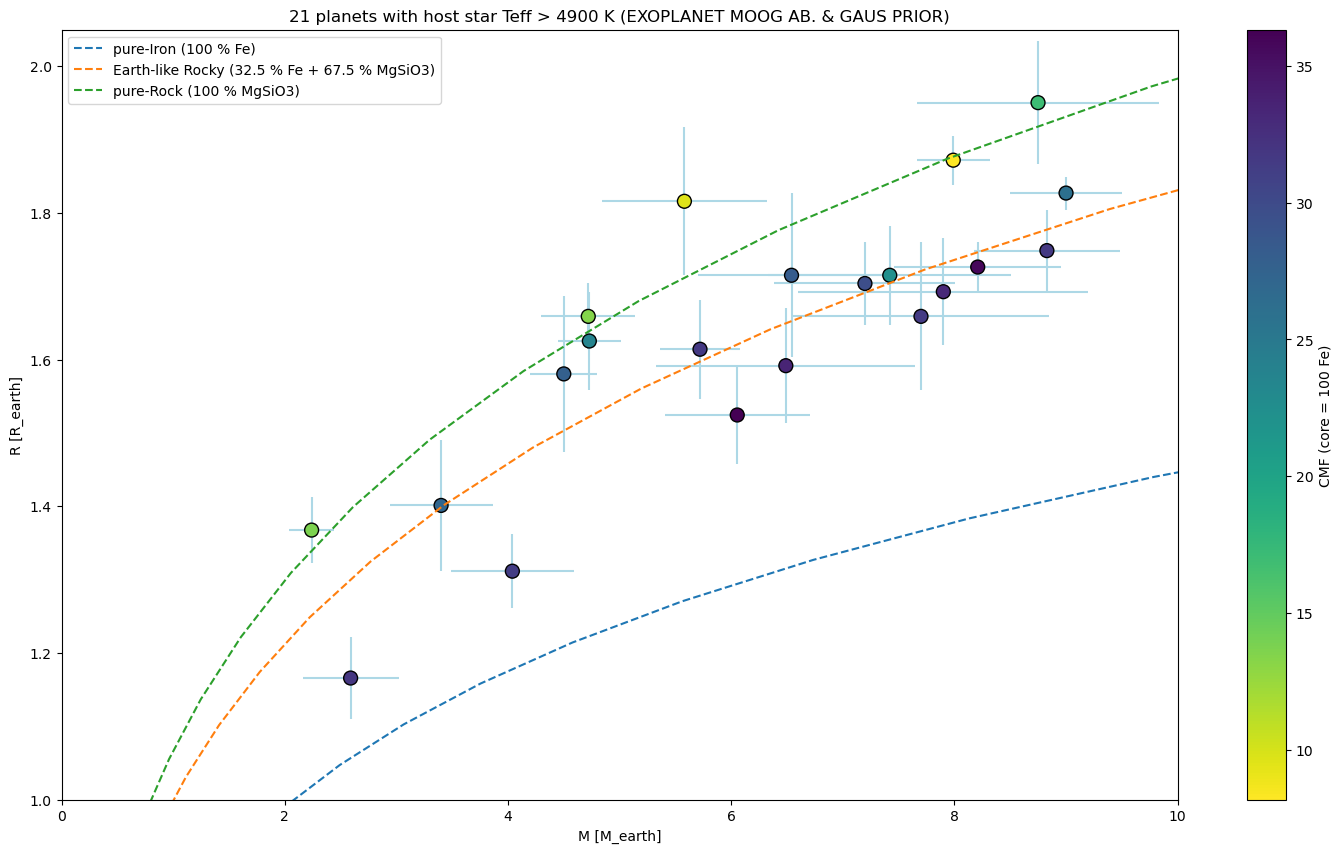

In [58]:
plt.figure(figsize=(18,10))
plt.title("21 planets with host star Teff > 4900 K (EXOPLANET MOOG AB. & GAUS PRIOR)")

#M & R 
plt.errorbar(mass,radius,xerr=mass_sigma,yerr=radius_sigma,fmt="o",zorder=1,ecolor="lightblue",color="r")
#IMF
plt.scatter(mass, radius, c=sample["f_iron_exoplex_gaus"], cmap='viridis_r', s=100, edgecolors='k',zorder=2)
plt.colorbar(label='CMF (core = 100 Fe)')

#M R relations
plt.plot(mass_pure_iron,radius_pure_iron,label=f"pure-Iron (100 % Fe)",linestyle="--")
plt.plot(mass_earthlike,radius_earthlike,label=f"Earth-like Rocky (32.5 % Fe + 67.5 % MgSiO3)",linestyle="--")
plt.plot(mass_pure_rock,radius_pure_rock,label=f"pure-Rock (100 % MgSiO3)",linestyle="--")
#plt.plot(mass_pure_h2o,radius_pure_h2o,label=f"0.1 % H2 atmosphere (at 2000 K)",linestyle="--")
#plt.plot(mass_half_h2o,radius_half_h2o,label=f"5 % H2 atmosphere (50% Earth-like rocky core + 50% H2O layer by mass) (at 2000K)",linestyle="--")

plt.xlabel("M [M_earth]")
plt.ylabel("R [R_earth]")
plt.xlim(0,10)
plt.ylim(1,2.05)
plt.legend()
#plt.savefig("/home/hannakasperer/Dissertation-/plots/M_R_cmf_exo_21.png",format="png")
plt.show()

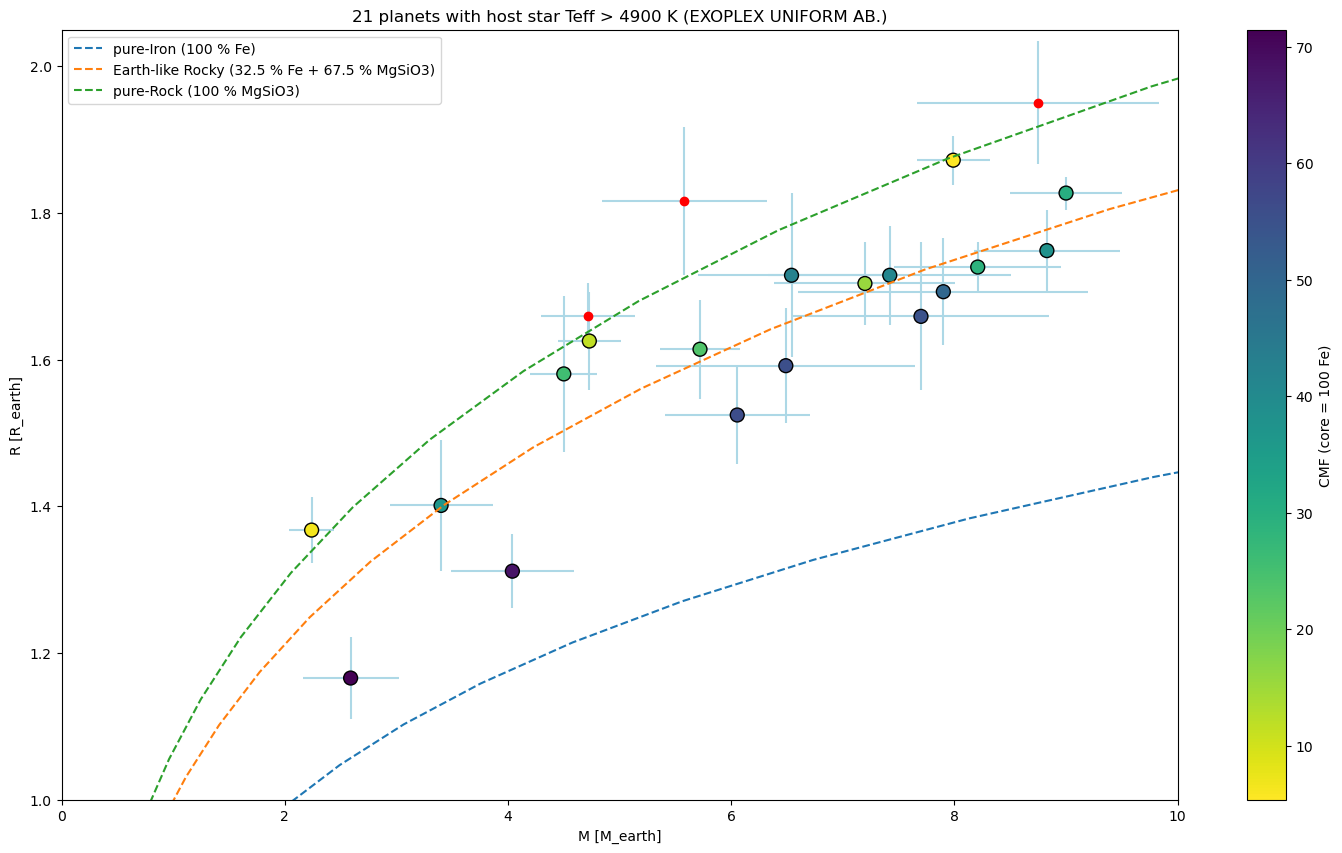

In [57]:
plt.figure(figsize=(18,10))
plt.title("21 planets with host star Teff > 4900 K (EXOPLEX UNIFORM AB.)")

#M & R 
plt.errorbar(mass,radius,xerr=mass_sigma,yerr=radius_sigma,fmt="o",zorder=1,ecolor="lightblue",color="r")
#IMF
plt.scatter(mass, radius, c=sample["f_iron_exoplex_unif"], cmap='viridis_r', s=100, edgecolors='k',zorder=2)
plt.colorbar(label='CMF (core = 100 Fe)')

#M R relations
plt.plot(mass_pure_iron,radius_pure_iron,label=f"pure-Iron (100 % Fe)",linestyle="--")
plt.plot(mass_earthlike,radius_earthlike,label=f"Earth-like Rocky (32.5 % Fe + 67.5 % MgSiO3)",linestyle="--")
plt.plot(mass_pure_rock,radius_pure_rock,label=f"pure-Rock (100 % MgSiO3)",linestyle="--")
#plt.plot(mass_pure_h2o,radius_pure_h2o,label=f"0.1 % H2 atmosphere (at 2000 K)",linestyle="--")
#plt.plot(mass_half_h2o,radius_half_h2o,label=f"5 % H2 atmosphere (50% Earth-like rocky core + 50% H2O layer by mass) (at 2000K)",linestyle="--")

plt.xlabel("M [M_earth]")
plt.ylabel("R [R_earth]")
plt.xlim(0,10)
plt.ylim(1,2.05)
plt.legend()
#plt.savefig("/home/hannakasperer/Dissertation-/plots/M_R_cmf_exo_21.png",format="png")
plt.show()

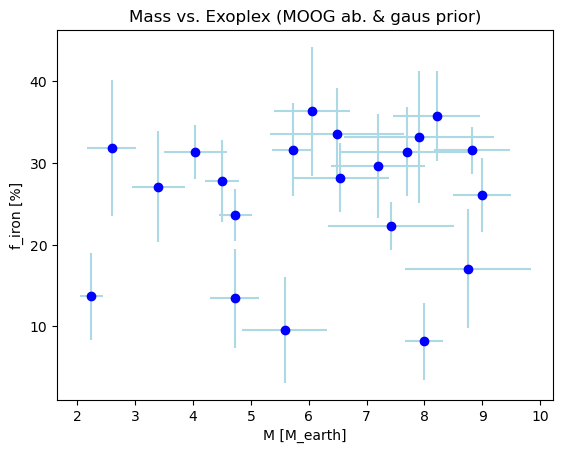

Text(0, 0.5, 'f_iron [%]')

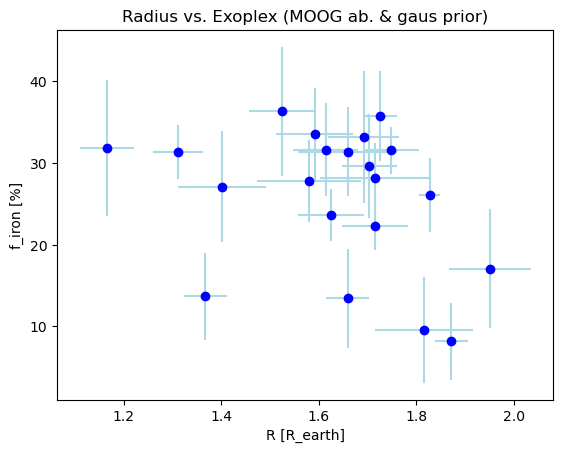

In [61]:
plt.title("Mass vs. Exoplex (MOOG ab. & gaus prior)")
plt.errorbar(mass,sample["f_iron_exoplex_gaus"],xerr=mass_sigma,yerr=sample["f_iron_exoplex_gaus_err"],fmt="o",color="blue",ecolor="lightblue")
plt.xlabel("M [M_earth]")
plt.ylabel("f_iron [%]")
plt.show()

plt.title("Radius vs. Exoplex (MOOG ab. & gaus prior)")
plt.errorbar(radius,sample["f_iron_exoplex_gaus"],xerr=radius_sigma,yerr=sample["f_iron_exoplex_gaus_err"],fmt="o",color="blue",ecolor="lightblue")
plt.xlabel("R [R_earth]")
plt.ylabel("f_iron [%]")

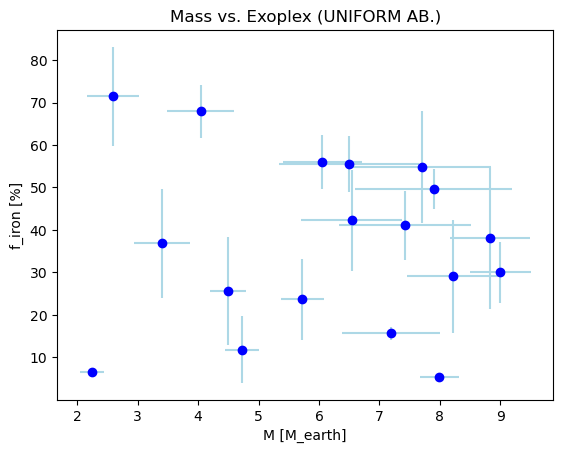

Text(0, 0.5, 'f_iron [%]')

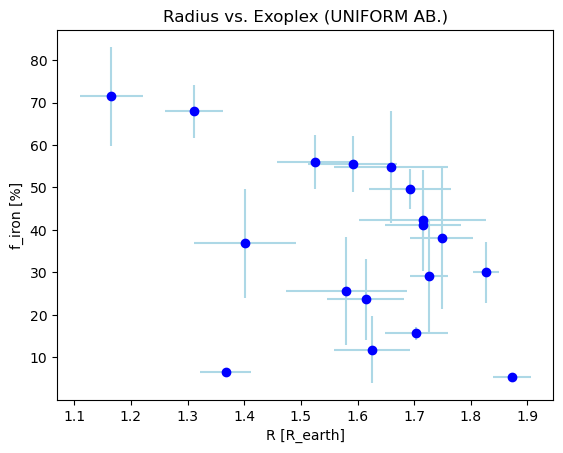

In [62]:
plt.title("Mass vs. Exoplex (UNIFORM AB.)")
plt.errorbar(mass,sample["f_iron_exoplex_unif"],xerr=mass_sigma,yerr=sample["f_iron_exoplex_unif_err"],fmt="o",color="blue",ecolor="lightblue")
plt.xlabel("M [M_earth]")
plt.ylabel("f_iron [%]")
plt.show()

plt.title("Radius vs. Exoplex (UNIFORM AB.)")
plt.errorbar(radius,sample["f_iron_exoplex_unif"],xerr=radius_sigma,yerr=sample["f_iron_exoplex_unif_err"],fmt="o",color="blue",ecolor="lightblue")
plt.xlabel("R [R_earth]")
plt.ylabel("f_iron [%]")

In [90]:
solar_fe = 7.46
solar_fe_sigma = 0.04

solar_mg = 7.55
solar_mg_sigma = 0.03

solar_si = 7.51
solar_si_sigma = 0.03

Fe = 10**(solar_fe + sample["feh"])
Mg = 10**(solar_mg + sample["MgI_rel_sun"])
Si = 10**(solar_si + sample["SiI_rel_sun"])

FeMg = np.array(Fe / Mg, dtype=np.float64)
SiMg = np.array(Si / Mg, dtype=np.float64)

sigFe = Fe * np.log(10) * sample["erfeh"]
sigMg = Mg * np.log(10) * sample["MgI_err"]
sigSi = Si * np.log(10) * sample["SiI_err"]

sigFeMg = FeMg * np.sqrt((sigFe/Fe)**2 + (sigMg/Mg)**2)
sigSiMg = SiMg * np.sqrt((sigSi/Si)**2 + (sigMg/Mg)**2)

In [106]:
np.max(sample["f_iron_pbb"]/100) 

0.3321

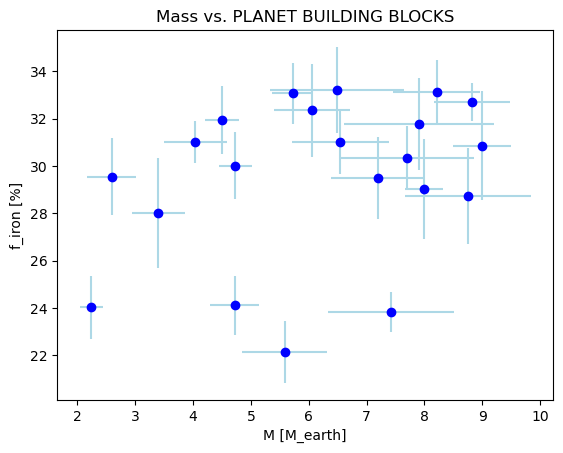

Text(0, 0.5, 'f_iron [%]')

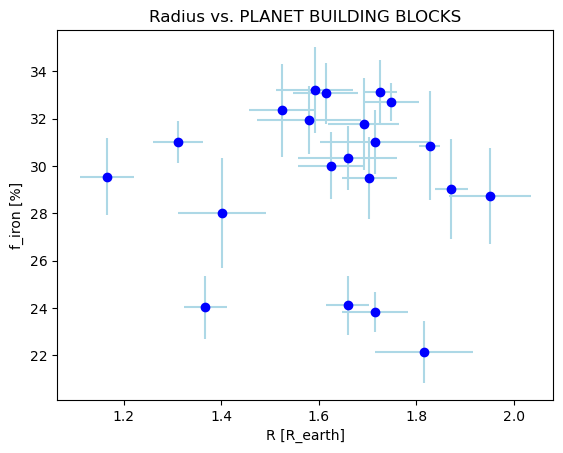

In [63]:
plt.title("Mass vs. PLANET BUILDING BLOCKS")
plt.errorbar(mass,sample["f_iron_pbb"],xerr=mass_sigma,yerr=sample["f_iron_pbb_err"],fmt="o",color="blue",ecolor="lightblue")
plt.xlabel("M [M_earth]")
plt.ylabel("f_iron [%]")
plt.show()

plt.title("Radius vs. PLANET BUILDING BLOCKS")
plt.errorbar(radius,sample["f_iron_pbb"],xerr=radius_sigma,yerr=sample["f_iron_pbb_err"],fmt="o",color="blue",ecolor="lightblue")
plt.xlabel("R [R_earth]")
plt.ylabel("f_iron [%]")

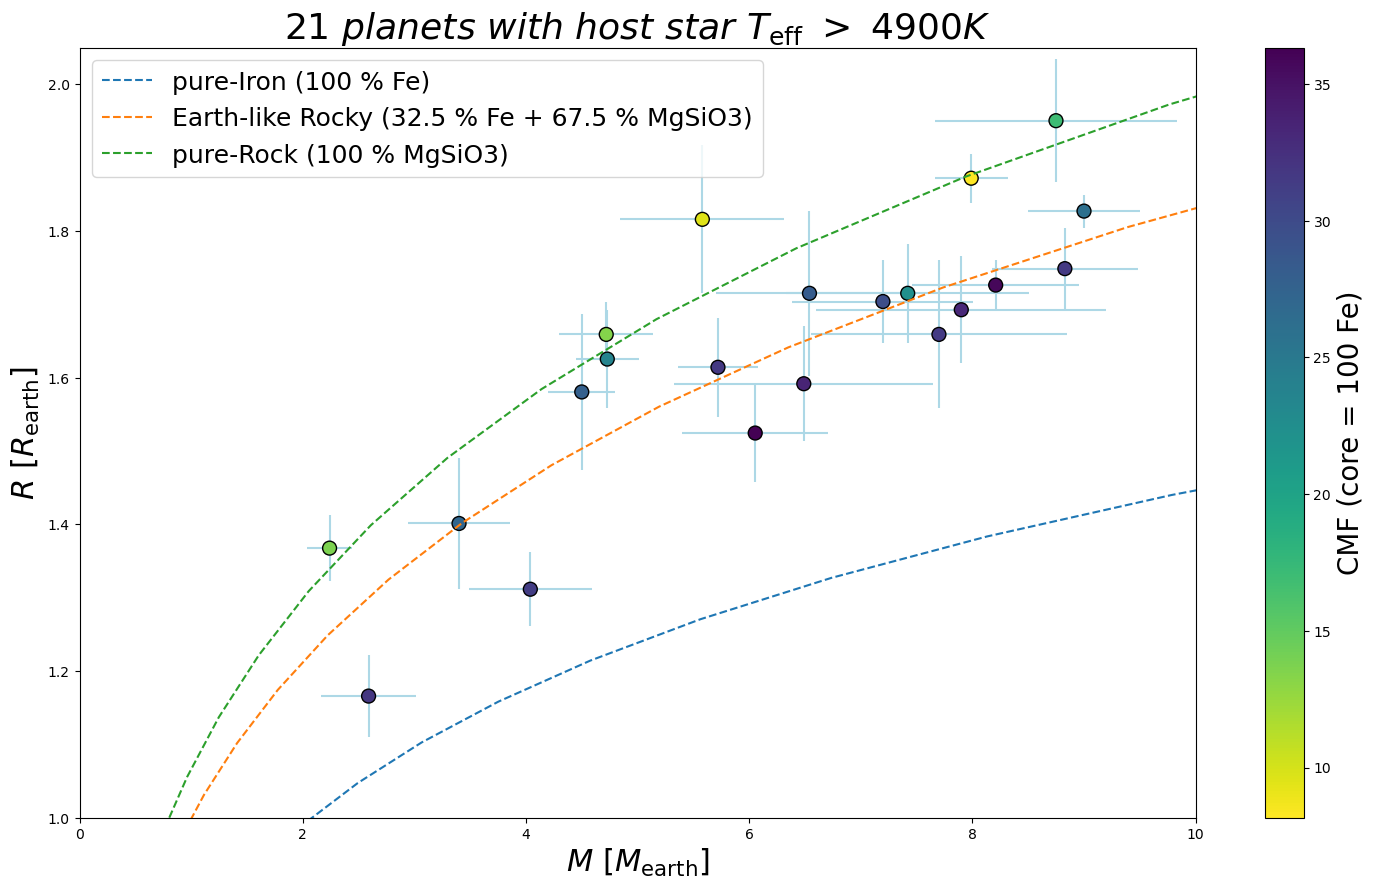

In [88]:
plt.figure(figsize=(18,10))
plt.title(r"$21\ planets\ with\ host\ star\ T_{\text{eff}}\ >\ 4900 K$",fontsize=26)

#M & R 
plt.errorbar(mass,radius,xerr=mass_sigma,yerr=radius_sigma,fmt="o",zorder=1,ecolor="lightblue",color="r")
#IMF
plt.scatter(mass, radius, c=sample["f_iron_exoplex_gaus"], cmap='viridis_r', s=100, edgecolors='k',zorder=2)
cbar = plt.colorbar()
cbar.set_label('CMF (core = 100 Fe)', fontsize=20) 

#M R relations
plt.plot(mass_pure_iron,radius_pure_iron,label=f"pure-Iron (100 % Fe)",linestyle="--")
plt.plot(mass_earthlike,radius_earthlike,label=f"Earth-like Rocky (32.5 % Fe + 67.5 % MgSiO3)",linestyle="--")
plt.plot(mass_pure_rock,radius_pure_rock,label=f"pure-Rock (100 % MgSiO3)",linestyle="--")
#plt.plot(mass_pure_h2o,radius_pure_h2o,label=f"0.1 % H2 atmosphere (at 2000 K)",linestyle="--")
#plt.plot(mass_half_h2o,radius_half_h2o,label=f"5 % H2 atmosphere (50% Earth-like rocky core + 50% H2O layer by mass) (at 2000K)",linestyle="--")

plt.xlabel(r"$M\ [M_{\text{earth}}]$", fontsize=22)
plt.ylabel(r"$R\ [R_{\text{earth}}]$", fontsize=22)
plt.xlim(0,10)
plt.ylim(1,2.05)
plt.legend(fontsize=18)
plt.savefig("/home/hannakasperer/Dissertation-/plots/M_R_cmf_exo_21.png",format="png")
plt.show()

## compare with given IMFs

In [10]:
#metallcities CROSSMATCH WITH MY SAMPLE!
path = '/home/hannakasperer/Dissertation-/metallcities_vardan21.txt'
metal = pd.read_csv(path,sep=' ') 

metal[['fstariron_value', 'f_iron_error']] = metal['fstariron'].str.split('±', expand=True)
metal['f_iron_error'] = metal['f_iron_error'].astype(float)
metal['fstariron'] = metal['fstariron_value'].astype(float)

metal

,Star,Teff,logg,Vtur,[Fe/H],[Mg/H],[Si/H],fstariron,fstariron_value,f_iron_error
0,K2-38,5731±66∗,4.38±0.11∗,0.98±0.03∗,0.26±0.05∗,0.24±0.05∗,0.27±0.06∗,33.40,33.40,2.14
1,K2-106,5522±34,4.34±0.05,0.87±0.05,0.10±0.03,0.07±0.05,0.05±0.03,35.25,35.25,1.36
2,K2-229,5196±35,4.39±0.07,0.91±0.06,-0.06±0.02,-0.07±0.03,-0.06±0.05,33.44,33.44,1.28
3,Kepler-107,5958±37,4.21±0.05,1.25±0.04,0.42±0.03,0.41±0.11,0.37±0.04,34.79,34.79,2.41
4,Kepler-406,5625±28,4.26±0.05,0.96±0.04,0.24±0.02,0.23±0.05,0.25±0.04,33.05,33.05,1.31
5,K2-291,5541±24,4.39±0.06,0.97±0.04,0.09±0.02,0.10±0.03,0.04±0.04,34.10,34.10,1.03
6,55-Cnc,5341±62,4.26±0.14,0.94±0.09,0.32±0.04,0.42±0.06,0.35±0.05,30.22,30.22,1.91
7,EPIC-249893012,5552±27,4.01±0.05,1.11±0.03,0.15±0.02,0.21±0.05,0.17±0.03,31.33,31.33,1.17
8,HD-213885,5885±15,4.39±0.03,1.06±0.02,0.00±0.01,-0.01±0.04,-0.01±0.03,33.95,33.95,0.97
9,HD-219134,4789±54,4.15±0.19,0.69±0.14,-0.03±0.03,-0.03±0.06,0.0±0.06,32.45,32.45,1.68


In [11]:
sample['star_normalized'] = sample['star'].str.replace('-', '', regex=False).str.extract(r'^([A-Za-z0-9\-]+)', expand=False).str.lower()

metal['star_normalized'] = metal['Star'].str.replace('-', '', regex=False).str.extract(r'^([A-Za-z0-9\-]+)', expand=False).str.lower()

merged_sample = pd.merge(sample, metal, left_on='star_normalized', right_on='star_normalized', how='inner')
print(merged_sample)

                             star    teff  erteff  logg_x  erlogg   vtur  \
0  55Cnc_SINGLEHR11_ESPRESSO_2022  5310.0    51.0   4.211   0.116  0.907   
1            K2-106_ESPRESSO_2024  5505.0    24.0   4.338   0.040  0.738   
2            K2-229_ESPRESSO_2024  5126.0    34.0   4.336   0.079  0.809   
3           TOI-402_ESPRESSO_2024  5067.0    47.0   4.201   0.119  0.568   
4          HD213885_ESPRESSO_2024  5906.0    17.0   4.427   0.025  1.043   
5            HD3167_ESPRESSO_2024  5228.0    32.0   4.285   0.064  0.676   
6            K2-265_ESPRESSO_2024  5427.0    27.0   4.345   0.047  0.759   
7             K2-38_ESPRESSO_2024  5726.0    22.0   4.266   0.032  0.965   
8           TOI-561_ESPRESSO_2024  5318.0    20.0   4.390   0.047  0.455   
9           WASP-47_ESPRESSO_2024  5552.0    37.0   4.296   0.066  0.947   

   ervtur    feh  erfeh    NaI  ...       Star      Teff      logg_y  \
0   0.069  0.299  0.033  6.931  ...     55-Cnc   5341±62   4.26±0.14   
1   0.037  0.080  0

In [12]:
merged_sample

,star,teff,erteff,logg_x,erlogg,vtur,ervtur,feh,erfeh,NaI,...,Star,Teff,logg_y,Vtur,[Fe/H],[Mg/H],[Si/H],fstariron,fstariron_value,f_iron_error
0,55Cnc_SINGLEHR11_ESPRESSO_2022,5310.0,51.0,4.211,0.116,0.907,0.069,0.299,0.033,6.931,...,55-Cnc,5341±62,4.26±0.14,0.94±0.09,0.32±0.04,0.42±0.06,0.35±0.05,30.22,30.22,1.91
1,K2-106_ESPRESSO_2024,5505.0,24.0,4.338,0.040,0.738,0.037,0.080,0.017,6.498,...,K2-106,5522±34,4.34±0.05,0.87±0.05,0.10±0.03,0.07±0.05,0.05±0.03,35.25,35.25,1.36
2,K2-229_ESPRESSO_2024,5126.0,34.0,4.336,0.079,0.809,0.066,-0.088,0.020,6.340,...,K2-229,5196±35,4.39±0.07,0.91±0.06,-0.06±0.02,-0.07±0.03,-0.06±0.05,33.44,33.44,1.28
3,TOI-402_ESPRESSO_2024,5067.0,47.0,4.201,0.119,0.568,0.098,0.054,0.027,6.582,...,TOI-402,5081±43,4.21±0.13,0.71±0.10,0.03±0.03,0.09±0.04,0.06±0.05,30.87,30.87,1.38
4,HD213885_ESPRESSO_2024,5906.0,17.0,4.427,0.025,1.043,0.025,-0.005,0.013,6.402,...,HD-213885,5885±15,4.39±0.03,1.06±0.02,0.00±0.01,-0.01±0.04,-0.01±0.03,33.95,33.95,0.97
5,HD3167_ESPRESSO_2024,5228.0,32.0,4.285,0.064,0.676,0.056,-0.019,0.021,6.402,...,HD-3167,5306±36,4.35±0.07,0.69±0.06,0.04±0.02,0.10±0.04,0.03±0.04,32.15,32.15,1.27
6,K2-265_ESPRESSO_2024,5427.0,27.0,4.345,0.047,0.759,0.045,0.049,0.019,6.455,...,K2-265,5466±26,4.36±0.05,0.77±0.05,0.09±0.02,0.11±0.03,0.05±0.04,33.73,33.73,1.15
7,K2-38_ESPRESSO_2024,5726.0,22.0,4.266,0.032,0.965,0.034,0.257,0.017,6.728,...,K2-38,5731±66∗,4.38±0.11∗,0.98±0.03∗,0.26±0.05∗,0.24±0.05∗,0.27±0.06∗,33.40,33.40,2.14
8,TOI-561_ESPRESSO_2024,5318.0,20.0,4.390,0.047,0.455,0.056,-0.404,0.014,6.053,...,TOI-561,5314±20,4.37±0.04,0.54±0.05,-0.39±0.02,-0.18±0.04,-0.27±0.03,25.23,25.23,1.06
9,WASP-47_ESPRESSO_2024,5552.0,37.0,4.296,0.066,0.947,0.052,0.404,0.027,6.923,...,WASP-47,5559±52,4.32±0.12,1.09±0.07,0.40±0.04,0.46±0.06,0.43±0.05,30.79,30.79,1.86


Text(0.5, 0, 'metallicities list')

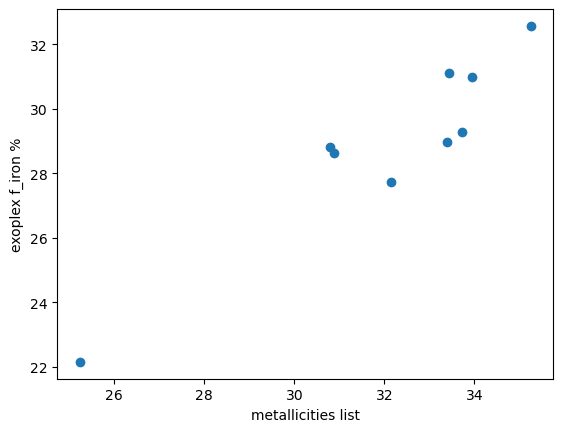

In [13]:
plt.scatter(merged_sample["fstariron"],merged_sample['f_iron_exoplex'])
plt.ylabel("exoplex f_iron %")
plt.xlabel("metallicities list")